In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv(r'C:\Users\acer\OneDrive\Desktop\dataset_innobyte.csv')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [7]:
df.tail(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [34]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
Month                 0
dtype: int64

In [7]:
df = df.drop(columns=['New','PendingS'])

In [9]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce', dayfirst=False )
df=df.dropna(subset=['currency','Amount','ship-city','ship-state','ship-postal-code','ship-country'])

C:\Users\acer\AppData\Local\Temp\ipykernel_14740\1023457576.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce', dayfirst=False )


In [11]:
df['fulfilled-by'] = df['fulfilled-by'].fillna("Unknown")
df['ship-postal-code'] = df['ship-postal-code'].astype(str).str.replace('\.O$','',regex=True)
df=df.drop_duplicates()

Total Sales: ₹78,478,115.39
Total Orders: 112861
Total Quantity Sold: 116301
Average Order Value: ₹695.35

Order Status Breakdown:
 Status
Shipped                          77489
Shipped - Delivered to Buyer     28700
Cancelled                        10746
Shipped - Returned to Seller      1946
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


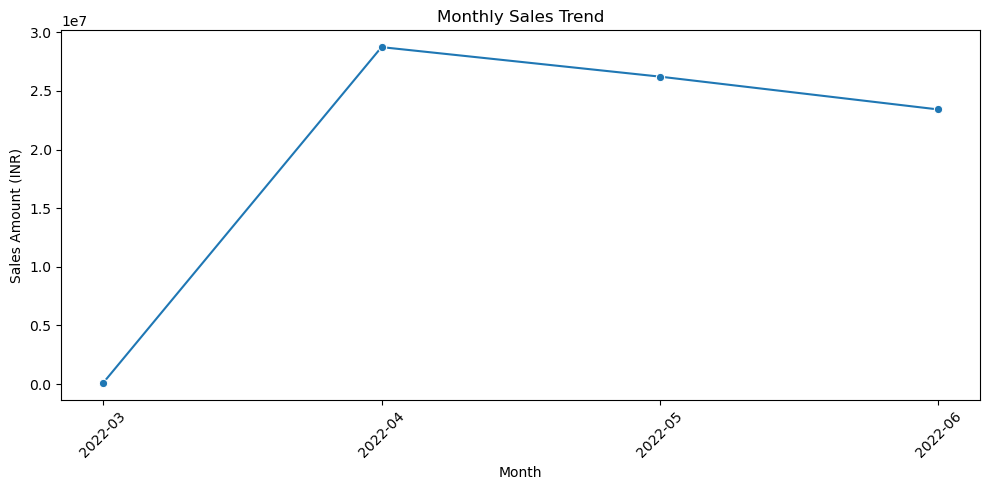

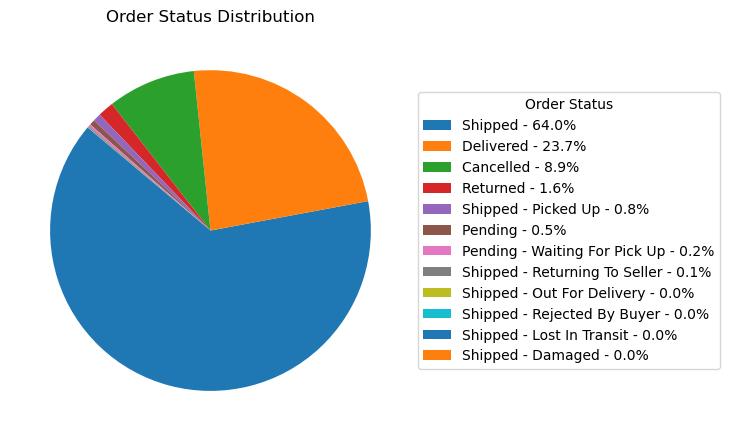

In [25]:


# Total metrics
total_sales = df['Amount'].sum()
total_orders = df['Order ID'].nunique()
total_qty = df['Qty'].sum()
avg_order_value = total_sales / total_orders

# Sales trend over time (monthly)
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

# Status breakdown
status_counts = df['Status'].value_counts()

# Print key figures
print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Quantity Sold: {total_qty}")
print(f"Average Order Value: ₹{avg_order_value:.2f}")
print("\nOrder Status Breakdown:\n", status_counts)

# Plot: Monthly Sales Trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='Amount', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.ylabel('Sales Amount (INR)')
plt.tight_layout()
plt.show()

# Get status counts
status_counts = df['Status'].value_counts()

# Cleaned labels
clean_labels = {
    'Shipped': 'Shipped',
    'Shipped - Delivered to Buyer': 'Delivered',
    'Cancelled': 'Cancelled',
    'Shipped - Returned to Seller': 'Returned',
    'Pending': 'Pending',
    # Add more mappings if needed
}

# Get percentages for legend
status_labels = []
for status, count in status_counts.items():
    label = clean_labels.get(status, status.title())
    percent = (count / status_counts.sum()) * 100
    status_labels.append(f"{label} - {percent:.1f}%")

# Plot clean pie chart without text clutter
plt.figure(figsize=(7, 6))
plt.pie(status_counts, labels=None, startangle=140)
plt.legend(status_labels, title="Order Status", loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Order Status Distribution')
plt.tight_layout()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_14740\2253270409.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_qty.values, y=top_categories_qty.index, palette='viridis')


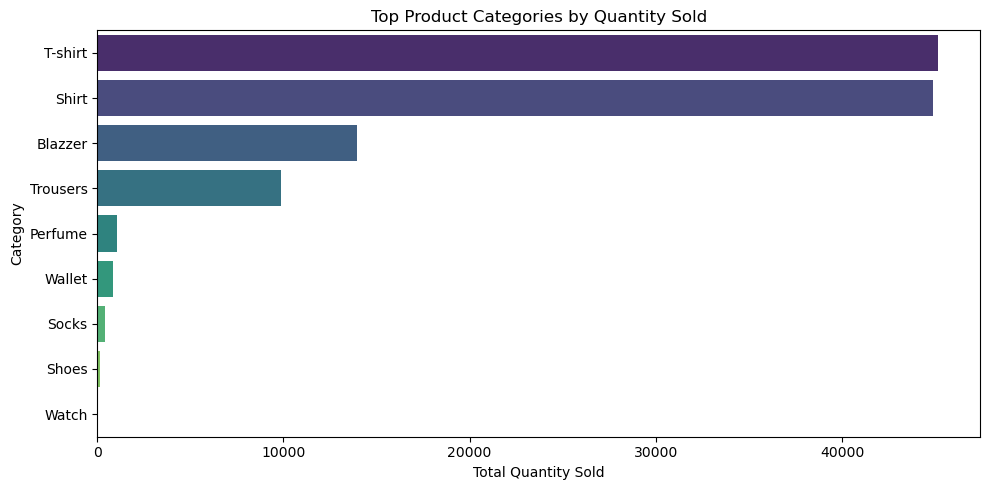

C:\Users\acer\AppData\Local\Temp\ipykernel_14740\2253270409.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories_sales.values, y=top_categories_sales.index, palette='magma')


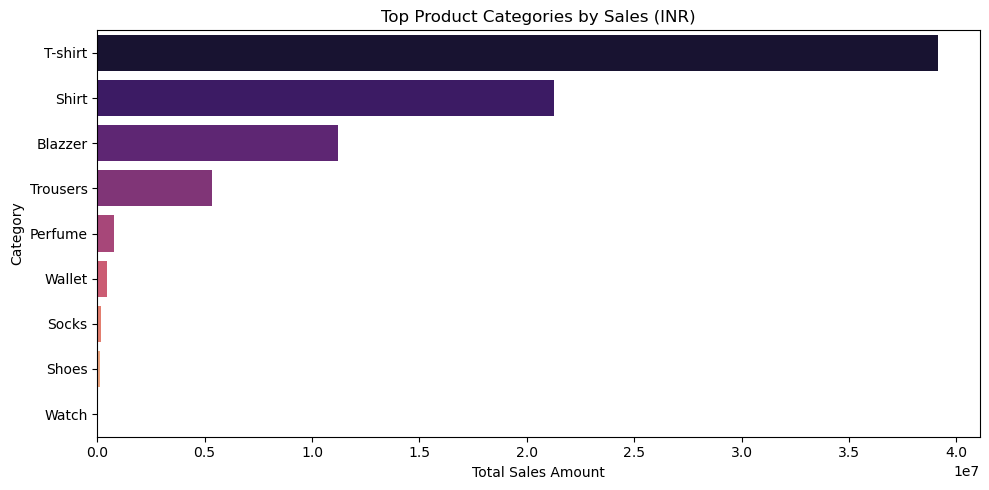

C:\Users\acer\AppData\Local\Temp\ipykernel_14740\2253270409.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sizes.values, y=top_sizes.index, palette='coolwarm')


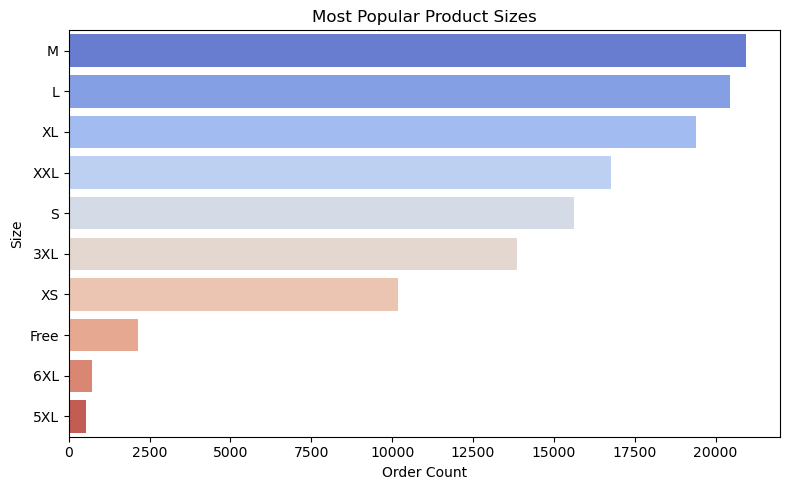

Number of top selling products :Category
T-shirt     45153
Shirt       44889
Blazzer     13929
Trousers     9883
Perfume      1051
Wallet        844
Socks         397
Shoes         152
Watch           3
Name: Qty, dtype: int64

Revenue generated :Category
T-shirt     39145184.17
Shirt       21261760.70
Blazzer     11207771.12
Trousers     5340325.30
Perfume       789419.66
Wallet        458408.18
Socks         150397.50
Shoes         123933.76
Watch            915.00
Name: Amount, dtype: float64

Revenue generated by sizes : Size
M      13674881.13
L      13018253.84
XL     12238302.38
XXL    10451395.64
S      10411616.18
Name: Amount, dtype: float64


In [13]:

# 1. Top-selling product categories by quantity
top_categories_qty = df.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(10)

# 2. Revenue by category
top_categories_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)

# 3. Most popular product sizes
top_sizes = df['Size'].value_counts().head(10)

# ---------------------------- Plotting ----------------------------

# Bar chart: Top categories by quantity
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories_qty.values, y=top_categories_qty.index, palette='viridis')
plt.title('Top Product Categories by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Bar chart: Revenue by category
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories_sales.values, y=top_categories_sales.index, palette='magma')
plt.title('Top Product Categories by Sales (INR)')
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# Bar chart: Most popular sizes
plt.figure(figsize=(8, 5))
sns.barplot(x=top_sizes.values, y=top_sizes.index, palette='coolwarm')
plt.title('Most Popular Product Sizes')
plt.xlabel('Order Count')
plt.ylabel('Size')
plt.tight_layout()
plt.show()

top_categories_qty = df.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(10)
print(f"Number of top selling products :{top_categories_qty}")
print()
top_category_revenue = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
print(f"Revenue generated :{top_category_revenue}")
print()
sizes_revenue = df.groupby('Size')['Amount'].sum().sort_values(ascending=False).head(5)
print(f"Revenue generated by sizes : {sizes_revenue}")

Number of Orders by Fulfillment Method:
 Fulfilment
Amazon      83524
Merchant    37464
Name: count, dtype: int64

 Quantity Sold by Fulfillment Method:
 Fulfilment
Amazon      83805
Merchant    32496
Name: Qty, dtype: int64

 Revenue by Fulfillment Method:
 Fulfilment
Amazon      54251299.00
Merchant    24226816.39
Name: Amount, dtype: float64

 Delivery Success Rate by Fulfillment (%):
 Fulfilment
Amazon      70.89
Merchant    29.11
Name: proportion, dtype: float64


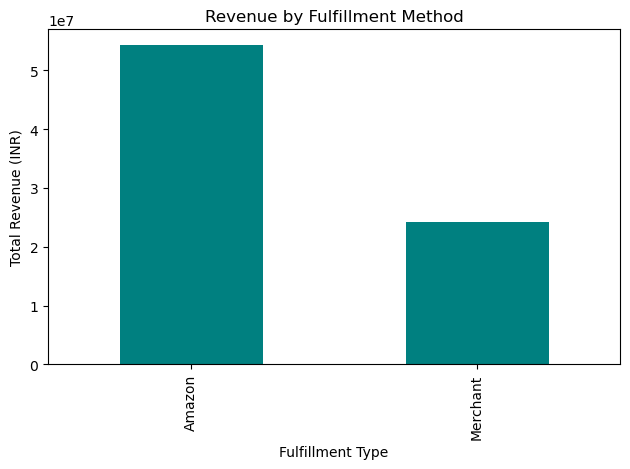

In [27]:
# Number of orders by fulfillment method
orders_by_fulfillment = df['Fulfilment'].value_counts()
print("Number of Orders by Fulfillment Method:\n", orders_by_fulfillment)

# Total quantity sold by fulfillment method
qty_by_fulfillment = df.groupby('Fulfilment')['Qty'].sum().sort_values(ascending=False)
print("\n Quantity Sold by Fulfillment Method:\n", qty_by_fulfillment)

# Total revenue by fulfillment method
revenue_by_fulfillment = df.groupby('Fulfilment')['Amount'].sum().sort_values(ascending=False)
print("\n Revenue by Fulfillment Method:\n", revenue_by_fulfillment)

# Delivery success: % of shipped orders per method
delivery_success = df[df['Status'].str.contains("Shipped", case=False)]
delivery_rate = delivery_success['Fulfilment'].value_counts(normalize=True) * 100
print("\n Delivery Success Rate by Fulfillment (%):\n", delivery_rate.round(2))

# Bar chart: revenue by fulfillment
revenue_by_fulfillment.plot(kind='bar', color='teal', title='Revenue by Fulfillment Method')
plt.ylabel('Total Revenue (INR)')
plt.xlabel('Fulfillment Type')
plt.tight_layout()
plt.show()

Top 5 Cities by Order Count:
 ship-city
BENGALURU    10659
HYDERABAD     7599
MUMBAI        5856
NEW DELHI     5439
CHENNAI       5130
Name: count, dtype: int64

Top 5 Cities by Revenue:
 ship-city
BENGALURU    6836614.65
HYDERABAD    4941790.25
MUMBAI       3696704.04
NEW DELHI    3608277.78
CHENNAI      3098745.74
Name: Amount, dtype: float64

Top 5 States by Quantity & Revenue:
                  Qty       Amount
ship-state                       
MAHARASHTRA    20304  13318966.38
KARNATAKA      15876  10465387.03
TELANGANA      10243   6909670.08
UTTAR PRADESH   9495   6814126.08
TAMIL NADU     10400   6510503.73

🏷 B2B vs B2C Sales Summary:
           Qty       Amount
B2B                       
False  115461  77886894.60
True      840    591220.79

💸 Order Segmentation by Value:
              count          sum
Order Type                     
High-Value   13315  16209580.72
Regular     107673  62268534.67


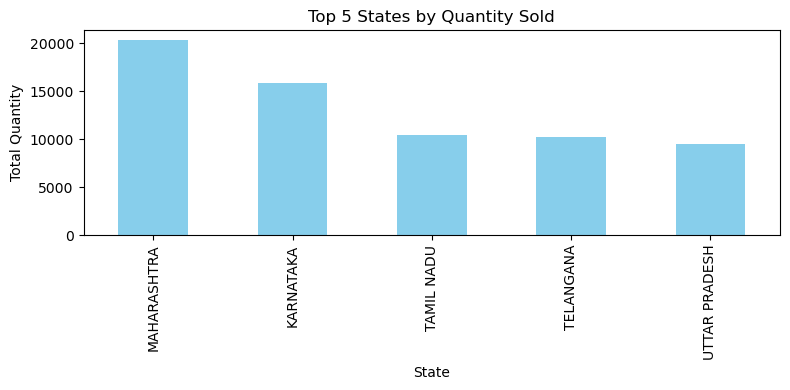

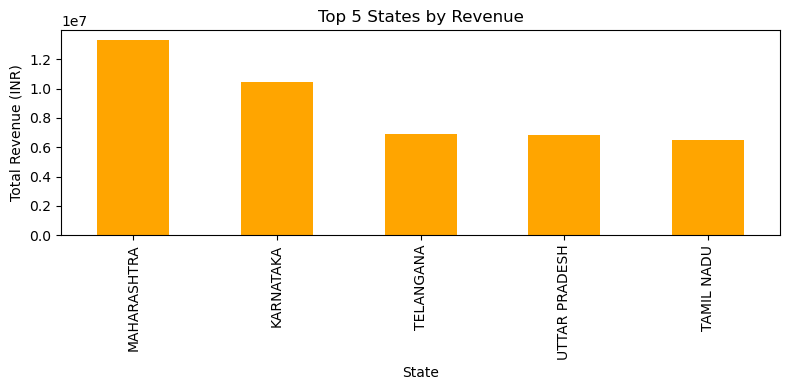

In [91]:
# Total orders per city
orders_per_city = df['ship-city'].value_counts().head(5)
print("Top 5 Cities by Order Count:\n", orders_per_city)

# Revenue per city
revenue_per_city = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Cities by Revenue:\n", revenue_per_city)

# Revenue and quantity per state
state_segment = df.groupby('ship-state')[['Qty', 'Amount']].sum().sort_values(by='Amount', ascending=False).head(5)
print("\nTop 5 States by Quantity & Revenue:\n", state_segment)

# Compare B2B vs. B2C orders
b2b_stats = df.groupby('B2B')[['Qty', 'Amount']].sum()
print("\n🏷 B2B vs B2C Sales Summary:\n", b2b_stats)

# Define high-value orders as > ₹1000
df['Order Type'] = df['Amount'].apply(lambda x: 'High-Value' if x > 1000 else 'Regular')

# Count and revenue by order type
seg_by_value = df.groupby('Order Type')['Amount'].agg(['count', 'sum'])
print("\n Order Segmentation by Value:\n", seg_by_value)

# Group data by state
state_summary = df.groupby('ship-state')[['Qty', 'Amount']].sum()

# Top 5 states by Quantity
top_states_qty = state_summary.sort_values(by='Qty', ascending=False).head(5)

# Top 5 states by Revenue
top_states_revenue = state_summary.sort_values(by='Amount', ascending=False).head(5)

# Plot: Top 5 States by Quantity
plt.figure(figsize=(8, 4))
top_states_qty['Qty'].plot(kind='bar', color='skyblue')
plt.title('Top 5 States by Quantity Sold')
plt.xlabel('State')
plt.ylabel('Total Quantity')
plt.tight_layout()
plt.show()

# Plot: Top 5 States by Revenue
plt.figure(figsize=(8, 4))
top_states_revenue['Amount'].plot(kind='bar', color='orange')
plt.title('Top 5 States by Revenue')
plt.xlabel('State')
plt.ylabel('Total Revenue (INR)')
plt.tight_layout()
plt.show()

Top 10 States by Revenue:
 ship-state
MAHARASHTRA       13318966.38
KARNATAKA         10465387.03
TELANGANA          6909670.08
UTTAR PRADESH      6814126.08
TAMIL NADU         6510503.73
DELHI              4228503.97
KERALA             3821997.58
WEST BENGAL        3503223.44
ANDHRA PRADESH     3214859.86
HARYANA            2879146.99
Name: Amount, dtype: float64


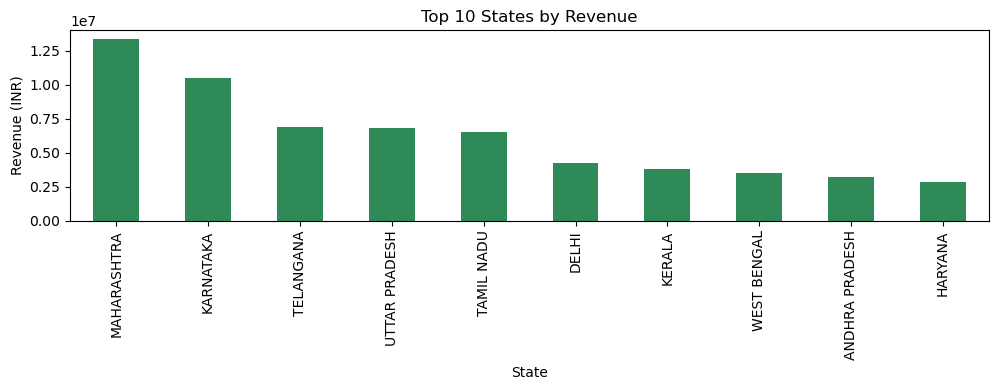

📦 Top 10 Cities by Quantity Sold:
 ship-city
BENGALURU    10401
HYDERABAD     7327
MUMBAI        5640
NEW DELHI     5241
CHENNAI       4937
PUNE          3532
KOLKATA       2163
GURUGRAM      1731
THANE         1538
LUCKNOW       1283
Name: Qty, dtype: int64


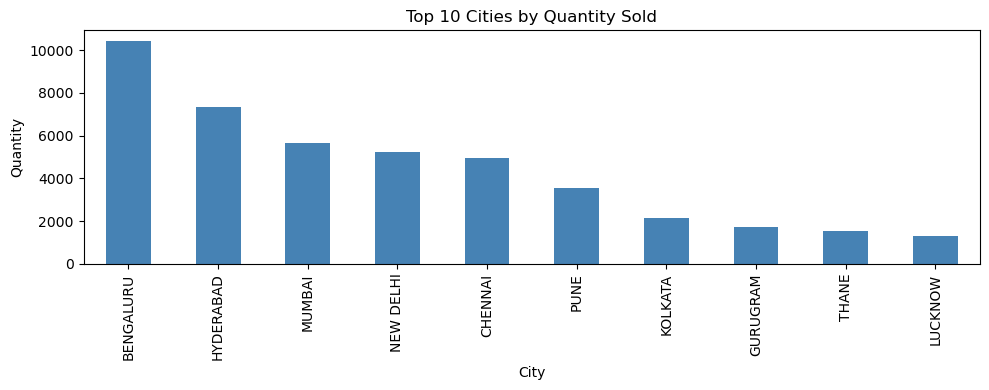

In [29]:
# Top 10 States by revenue 
top_states = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 States by Revenue:\n", top_states)
top_states.plot(kind='bar', color='seagreen', title='Top 10 States by Revenue', figsize=(10, 4))
plt.ylabel('Revenue (INR)')
plt.xlabel('State')
plt.tight_layout()
plt.show()

#Top 10 cities by quantity 
top_cities = df.groupby('ship-city')['Qty'].sum().sort_values(ascending=False).head(10)
print("📦 Top 10 Cities by Quantity Sold:\n", top_cities)
top_cities.plot(kind='bar', color='steelblue', title='Top 10 Cities by Quantity Sold', figsize=(10, 4))
plt.ylabel('Quantity')
plt.xlabel('City')
plt.tight_layout()
plt.show()

# Key Business Insights Based On My Analysis 


### 1. TOP REVENUE DRIVERS
1. **Maharashtra** and **Karnataka** are the **highest revenue-generating states**.
2.   Product category like **T-shirts** and **Shirts** dominate in both units **sold** and **revenue**.

###    RECOMMENDATION 
1. Focus marketing and stock allocation in **top-performing states**.
2. Priortize **best-selling categories** for replenishment and promotions. 

### 2. POPULAR SIZES 
1. Sizes like **M, L and XL** are ordered most frequently
2. High sales concentration around a few sizes

### RECOMMENDATION
1. Optimize inventory for top 3 sizes
2. Consider bundling popular sizes or offering combo packs

### 3. FULFILLMENT METHOD EFFECTIVENESS 
1. **Amazon-fulfilled orders** generate 2 times the revenue of merchant-fulfilled ones. 
2. Delivery success rate for Amazon: 71%, higher than merchants (29%).

### RECOMMENDATION
1. Increase use of **Amazon Fulfillment** to reduce cancellations and improve delivery rates. 
2. Provide training/support for merchants with poor fulfillment stats.

### 4. B2B vs B2C PATTERNS
1. Majority of sales (99%) are **B2C**.
2. **B2B sales** are minimal but have higher average order value.

### RECOMMENDATION:

1. Explore potential in B2B by offering bulk order discounts or exclusive categories.
2. Build B2B outreach campaigns to expand that channel.

### 5. REGIONAL GROWTH OPPORTUNITY 
1. States like **Delhi, Kerala, and Haryana** show decent revenue but aren’t in top for quantity.

### RECOMMENDATION 

1. These regions may respond well to promotions or targeted ads.
2. Explore **why unit sales are low** — pricing? shipping delays? inventory?

### 6. HIGH-VALUE ORDERS
1. We found over ₹1.6 Cr revenue from just **13,000 high-value orders**.

### RECOMMENDATION:
1. Focus on upselling or loyalty programs for high-value customers.
2. Introduce premium or personalized shopping experiences.

#  TO IMPROVE CUSTOMER SATISFACTION 
1. Ensure stock of popular sizes and products , sizes like M,L,XL and catgories like Shirts/T-shirts dominate orders.
2. Taking feedback from the customers on the regular basis.
3. Loyalty and rewards for the high-value customers.
4. Personalised promotion by region . 

# TO ENHANCE OVERALL BUSINESS. 
1. Focus on high performing regions.
2. Prioritize best selling products and sizes.
3. Tap into B2B sales potential.
4. Use data-driven regionals strategies.